In [1]:
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


In [2]:
fig_save_path = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin"\
                r"\Evolutionary Design\Thesis Chapter\Chapter 2.0\Figures\Section 9"

In [3]:
from Helper_Files.init_pop_hlpr1 import hlpr_fun
from Helper_Files.init_pop_hlpr2 import visualize
import re
from Helper_Files.result_section_hlpr1 import hlpr_fun as hlpr_fun_for_dtheta 

In [4]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

0.24
0.07
2
0.02
3
4


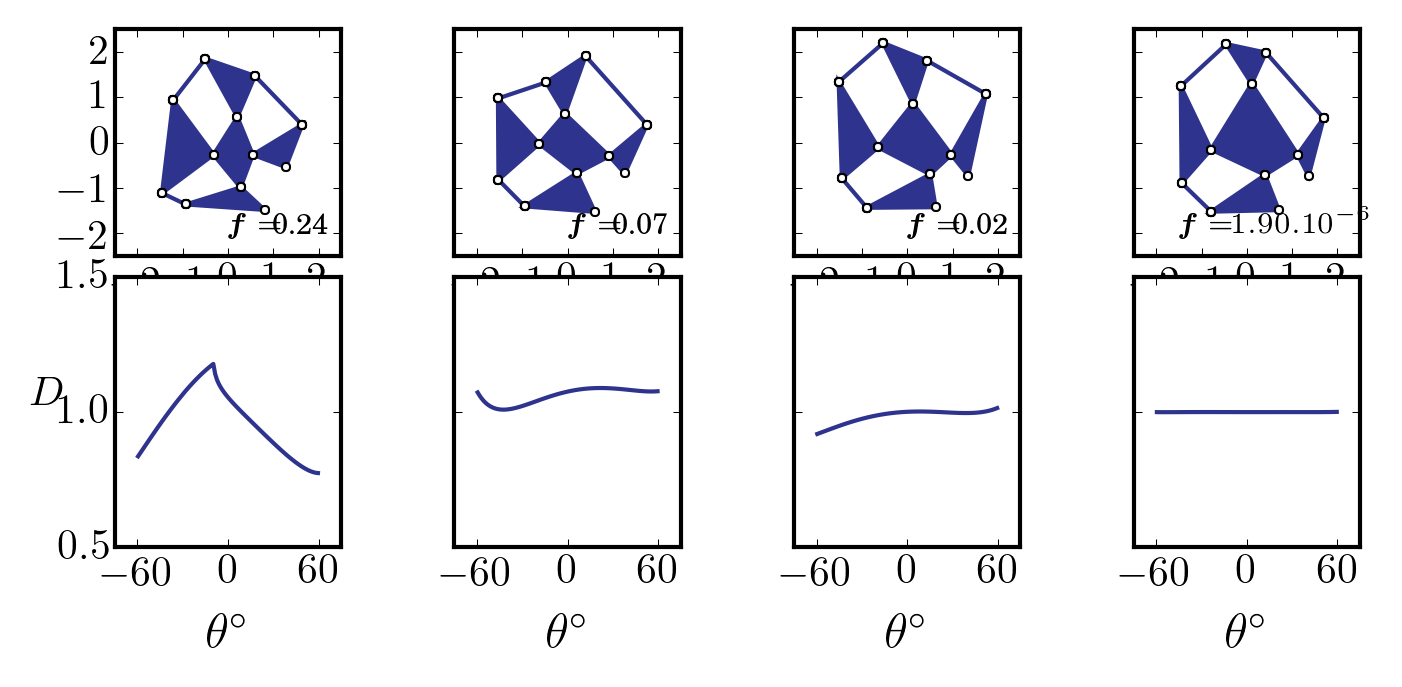

In [9]:
fig = fullfig(hf = 1.00)
plt.subplots_adjust(wspace=0.50, hspace=0.0)

data_dir = r'\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function'\
            r'\Horizontal Target Curve\Weight - 0.25\Movie\Data'
    
data_file = data_dir + r"\Tilings.npy"
data = np.load(data_file)

best_fitness = np.load(data_dir + r"\bestFitness.npy") 

generations = [0, 7, 16, 64]
count_= 1
for gen in generations:
    tiling = data[gen] / 4
    
    pos_vec, ShapeInfo = hlpr_fun(tiling)
    ax1 = plt.subplot(2,4,count_, aspect = 'equal')
    visualize(pos_vec, 3, ShapeInfo, '#2E348E')
    
    ax2 = plt.subplot(2,4,count_+4)
    hlpr_fun_for_dtheta (tiling)
    ax2.set_ylabel(r'$D$', labelpad=2.5, rotation = 0)
        
    #subplotlabel('(' + fig_index[count_-1] +')', ax=ax, loc='upper left', size = 10)

    if(gen == 64):
        #text_ = float("%.2f" % float(re.split(r'e', str(best_fitness[gen,0]))[0]) + 
        #          'e' + re.split(r'e', str(best_fitness[gen,0]))[1])
        ax1.text(-0.3,-2, r'$1.90.10^{-6}$', fontsize = 7) 
        ax1.text(-1.5,-2, r'$\boldsymbol{f} = $', fontsize = 7)
        
        
    else:
        text_ = "%.2f" % best_fitness[gen,0]
        print(text_)
        ax1.text(1,-2, text_, fontsize = 7)
        ax1.text(0,-2, r'$\boldsymbol{f} = $', fontsize = 7)
    
    if(count_ != 1):
        print(count_)
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])
        ax2.set_ylabel('')
      
    count_+= 1
    
    #ax1.set_xticklabels(ax1.get_xticks(), labelpad = -5)
    ax1.tick_params(axis='x', which='major', pad=1)
    ax2.set_xlabel(r'$\theta^{\circ}$', fontsize = 12, labelpad = 5)
   
    
    
    ax1.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax1.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax2.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax2.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    
#plt.savefig(fig_save_path + r'\evolve_one_example.pdf', format='pdf',bbox_inches='tight')
plt.show()    

## Convergence Curves: Poor Man's Results

In [93]:
data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"\
            r"\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25"
best_cost_grid = np.load(data_dir + r"\Data\best_cost_grid.npy")

n_best = 20               # considering the top 5 best solutions. 6 because one of the files is corrupted
def smallestN_indices(a, N):
    idx = a.ravel().argsort()[:N]
    return np.stack(np.unravel_index(idx, a.shape)).T

min_index_arr = smallestN_indices(best_cost_grid, n_best)

In [94]:
mean_fitness = np.zeros((n_best, 100, 1))
for count in range(n_best):
    
    i_ = min_index_arr[count, 0]
    j_ = min_index_arr[count, 1]
    k_ = min_index_arr[count, 2]
    
    Tiling = np.zeros((12, 2))

    str_ = "%02d"%(i_)
    file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*k_), "%02d"%(25*j_))+str_+'.out'
    fp = open(file)

    
    for i,line in enumerate(fp):
          if(i==9 or (i-1543)%1534 == 0):
                temp = re.split(r':', line)
                if(i==9):
                    mean_fitness[count,0,0] = temp[1]
                elif((i-1543)/1534 < 99):
                    mean_fitness[count,(i-1543)/1534+1,0] = temp[1]



C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [95]:
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
cmap = cmaps.viridis
a,b,c = min_index_arr[0]; a_,b_,c_ = min_index_arr[-1]
norm = mpl.colors.LogNorm(vmin=best_cost_grid[a,b,c], vmax=best_cost_grid[a_,b_,c_])

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:4085: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


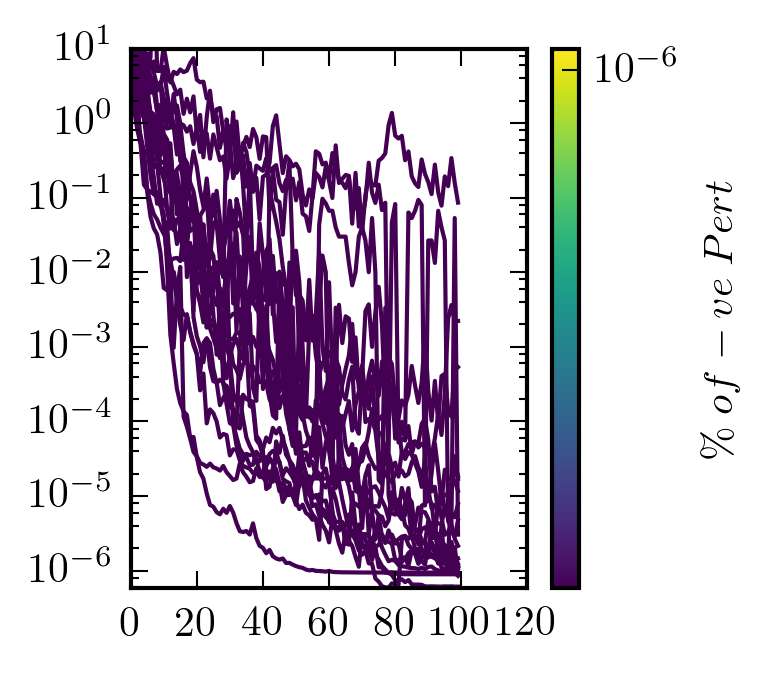

In [85]:
 min_index_arr[-1]


array([69,  5,  3], dtype=int64)